In [4]:
import dgf
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
prob = dgf.prob_utils.Probability("draco_a")

In [5]:
fg_data = pd.read_csv("./bg_characterize/foregrounds.csv")

Optimization terminated successfully.


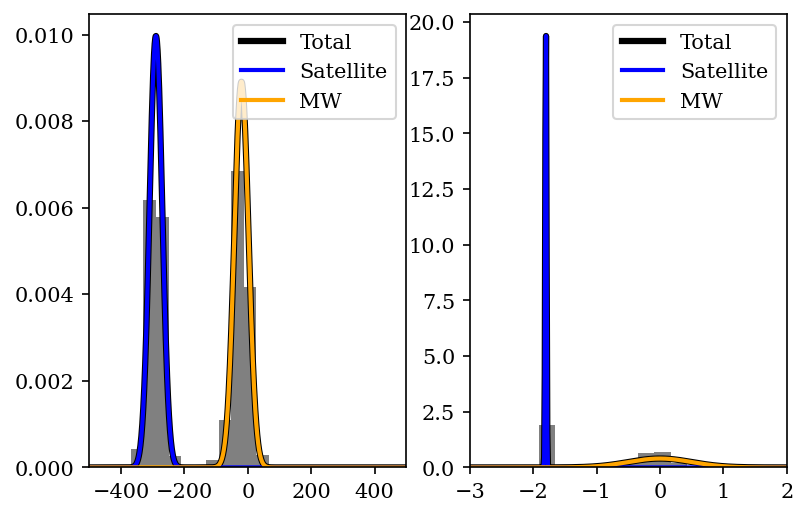

In [11]:
prob.dispersion_adv_project([.5, fg_data["hrv"][1], fg_data["dhrv"][1], 0, .5], rv_lim=[-500, 500])

In [4]:
adv_prob = prob.dispersion_adv(mw_theta=[.5, -10, 50, 0, .5])

Optimization terminated successfully.


100%|██████████| 5000/5000 [00:53<00:00, 93.08it/s] 


In [5]:
obs = prob.obs

In [6]:
obs.keys()

Index(['RA', 'DEC', 'HRV', 'dHRV', '[Fe/H]', 'd[Fe/H]', 'r', 'g', 'color',
       'member'],
      dtype='object')

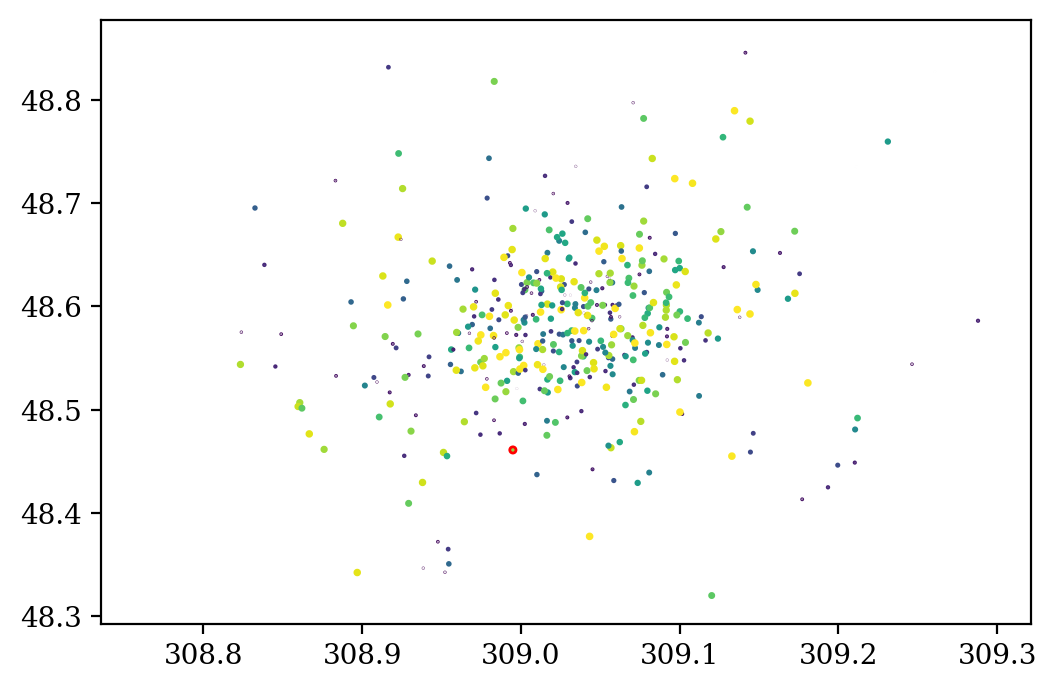

In [7]:
fig, ax = plt.subplots(dpi=200)
m = (adv_prob / np.max(adv_prob) > .1) & (obs['member'] == 0)
ax.scatter(obs['RA'], obs['DEC'], c=adv_prob, s=adv_prob*1e2)
ax.scatter(obs['RA'][m], obs['DEC'][m], fc='None', ec='red', s=5)
plt.show()

In [8]:
np.sum(m)

1

In [29]:
reg_prob = prob.dispersion(niter=5000)

100%|██████████| 5000/5000 [00:07<00:00, 650.84it/s]


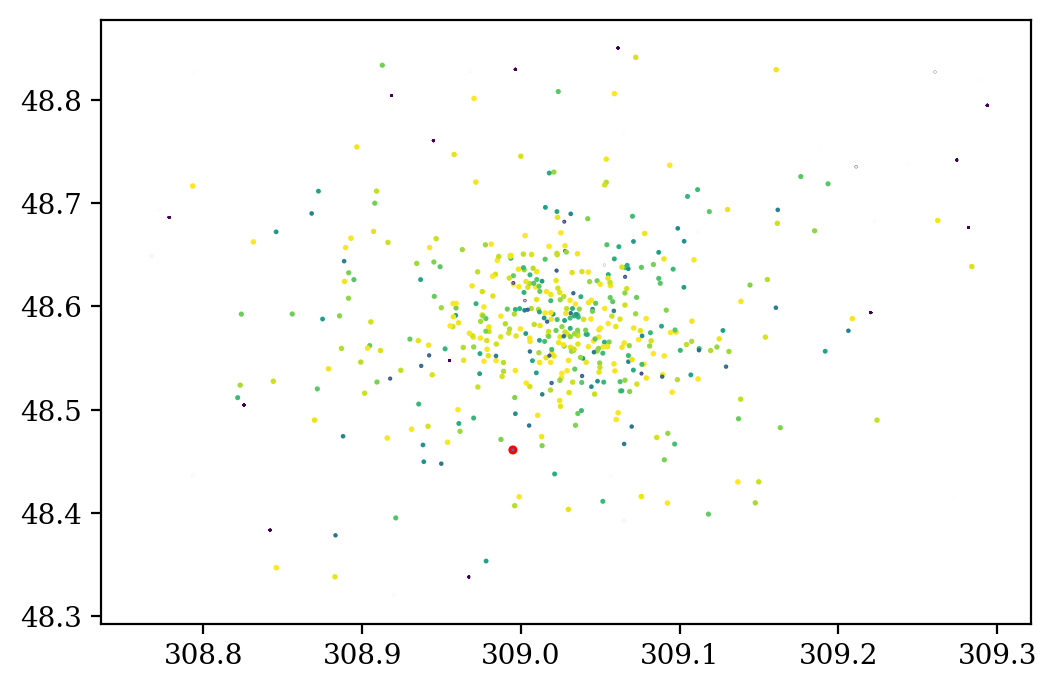

In [30]:
fig, ax = plt.subplots(dpi=200)
m2 = (reg_prob / np.max(reg_prob) > .1) & (obs['member'] == 0)
ax.scatter(obs['RA'], obs['DEC'], c=reg_prob, s=reg_prob*1e2)
ax.scatter(obs['RA'][m2], obs['DEC'][m2], fc='None', ec='red', s=5)
plt.show()

In [36]:
from astropy.coordinates import SkyCoord

In [37]:
coords = SkyCoord(prob.ra_0, prob.dec_0)

In [43]:
coords.galactic.b

<Latitude 4.72170867 deg>